Epoch: 0/10000		Training cost = 5.74e-01		Validation cost = 6.05e-01
Epoch: 100/10000		Training cost = 4.80e-01		Validation cost = 4.71e-01
Epoch: 200/10000		Training cost = 4.36e-01		Validation cost = 4.35e-01
Epoch: 300/10000		Training cost = 4.13e-01		Validation cost = 4.24e-01
Epoch: 400/10000		Training cost = 4.11e-01		Validation cost = 4.25e-01
Epoch: 500/10000		Training cost = 4.10e-01		Validation cost = 4.26e-01
Epoch: 600/10000		Training cost = 4.09e-01		Validation cost = 4.26e-01
Epoch: 700/10000		Training cost = 4.08e-01		Validation cost = 4.27e-01
Epoch: 800/10000		Training cost = 4.07e-01		Validation cost = 4.27e-01
Epoch: 900/10000		Training cost = 4.06e-01		Validation cost = 4.28e-01
Epoch: 1000/10000		Training cost = 4.05e-01		Validation cost = 4.28e-01
Epoch: 1100/10000		Training cost = 4.04e-01		Validation cost = 4.29e-01
Epoch: 1200/10000		Training cost = 4.02e-01		Validation cost = 4.31e-01
Epoch: 1300/10000		Training cost = 4.00e-01		Validation cost = 4.32e-01
Epoc

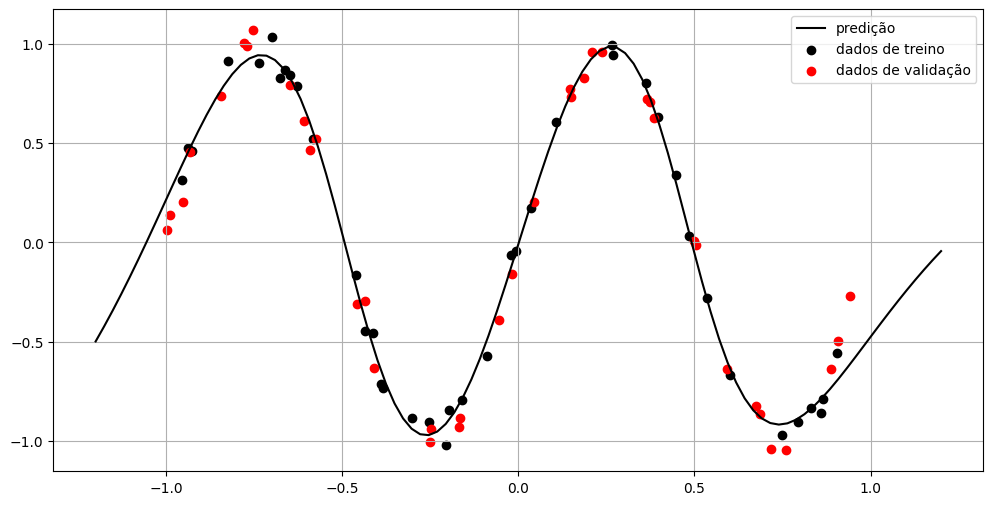

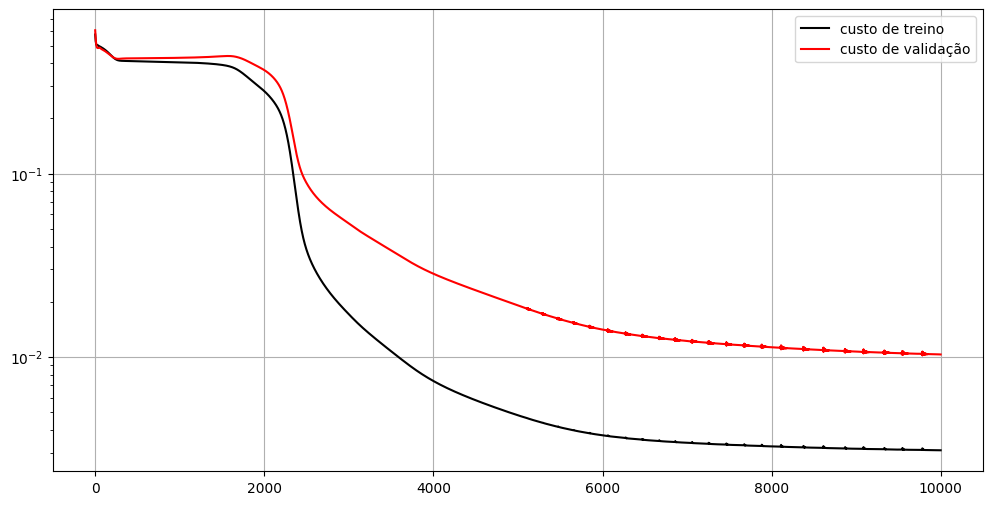

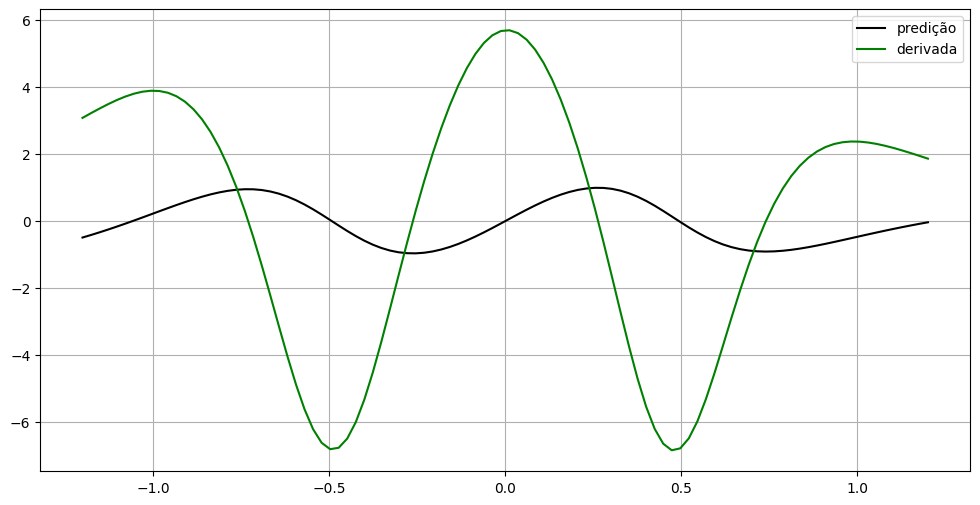

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Geração de dados sintéticos para treino e teste
torch.manual_seed(0)  # Semente fixa para reprodutibilidade

f = lambda x: torch.sin(2 * torch.pi * x)  # Função alvo (seno com período 1)

numberOfSamples = 40  # Número de amostras
noise = 0.1  # Amplitude do ruído aleatório

# Gera dados de treino e teste com ruído
xTrain = torch.rand((numberOfSamples, 1)) * 2 - 1  # Valores entre [-1, 1]
yTrain = f(xTrain) + noise * (torch.rand(xTrain.shape) * 2 - 1)  # Adiciona ruído

xTest = torch.rand((numberOfSamples, 1)) * 2 - 1  # Conjunto de validação
yTest = f(xTest) + noise * (torch.rand(xTest.shape) * 2 - 1)

# Configuração da arquitetura da rede neural
inputDimension = 1  # Dados unidimensionais
hiddenDimensions = [20, 20]  # Duas camadas ocultas com 20 neurônios cada
outputDimension = 1  # Saída unidimensional

nonlinearity = torch.nn.Sigmoid()  # Função de ativação (poderia ser ReLU)

# Construção automática da rede
modules = []
# Primeira camada (entrada -> primeira oculta)
modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))
modules.append(nonlinearity)

# Camadas intermediárias
for i in range(len(hiddenDimensions) - 1):
    modules.append(torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1]))
    modules.append(nonlinearity)

# Camada de saída
modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))

model = torch.nn.Sequential(*modules)  # Cria rede sequencial

# Configuração do treinamento
epochs = 10000  # Número de épocas
lr = 1e-3  # Taxa de aprendizado
regularization = 1e-4  # Termo de regularização L2

# Otimizador Adam com decaimento de peso (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=regularization)

# Função de custo (erro quadrático médio)
def costFunction(yPred, y):
    return torch.mean((yPred - y) ** 2)

# Loop de treinamento
costHistoryTrain = np.zeros(epochs)  # Histórico de custos (treino)
costHistoryTest = np.zeros(epochs)   # Histórico de custos (validação)

for epoch in range(epochs):
    optimizer.zero_grad()  # Zera os gradientes acumulados

    yPred = model(xTrain)  # Forward pass
    cost = costFunction(yPred, yTrain)  # Calcula o custo

    # Avaliação no conjunto de validação (sem calcular gradientes)
    with torch.no_grad():
        yPredTest = model(xTest)
        costTest = costFunction(yPredTest, yTest)

    # Armazena histórico
    costHistoryTrain[epoch] = cost.detach()
    costHistoryTest[epoch] = costTest

    cost.backward()  # Backpropagation
    optimizer.step()  # Atualiza parâmetros

    # Log a cada 100 épocas
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}/{epochs}\t\tTraining cost = {cost.detach():.2e}\t\tValidation cost = {costTest:.2e}")

# Visualização da predição final
x = torch.linspace(-1.2, 1.2, 100).unsqueeze(1)  # Pontos para plotagem
yPred = model(x).detach()  # Predição em modo de avaliação

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x, yPred, "k", label="predição")
ax.scatter(xTrain, yTrain, color="k", label="dados de treino")
ax.scatter(xTest, yTest, color="r", label="dados de validação")
ax.legend()
plt.show()

# Visualização do histórico de treinamento
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(costHistoryTrain, "k", label="custo de treino")
ax.plot(costHistoryTest, "r", label="custo de validação")
ax.legend()
ax.set_yscale("log")  # Escala logarítmica para melhor visualização
plt.show()

# Cálculo e visualização da derivada da rede
x = torch.linspace(-1.2, 1.2, 100, requires_grad=True).unsqueeze(1)
yPred = model(x)
# Calcula derivada automática
gradients = torch.autograd.grad(yPred, x, grad_outputs=torch.ones_like(yPred))[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x.detach().numpy(), yPred.detach().numpy(), "k", label="predição")
ax.plot(x.detach().numpy(), gradients, 'g', label='derivada')
ax.legend()
plt.show()